## Importing Libraries

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation,AveragePooling2D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import cifar10,fashion_mnist
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report

## Dataset 1 : CIFAR10

In [2]:
(trainX, trainy), (testX, testy)=tf.keras.datasets.cifar10.load_data()

In [3]:
print("Shape of TrainX:", trainX.shape)
print("Shape of Trainy:", trainy.shape)
print("Shape of TestX:", testX.shape)
print("Shape of Testy:", testy.shape)

Shape of TrainX: (50000, 32, 32, 3)
Shape of Trainy: (50000, 1)
Shape of TestX: (10000, 32, 32, 3)
Shape of Testy: (10000, 1)


In [4]:
trainX[1,:]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

### Normalizing Dataset

In [5]:
trainX = trainX/255.0
testX = testX/255.0

In [6]:
trainX[1,:]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[0]

'airplane'

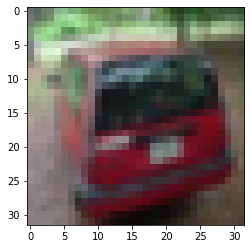

In [8]:
import random
idx = random.randint(0, len(trainX))
plt.imshow(trainX[idx,:])
plt.show()

## Applying CNN Model

In [21]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'softmax')
    ])

In [24]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [26]:
model.fit(trainX, trainy, epochs= 5, batch_size = 512,verbose = 1, validation_data=(testX,testy))

Epoch 1/5
98/98 [==============================] - 70s 716ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 2/5
98/98 [==============================] - 42s 430ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 3/5
98/98 [==============================] - 41s 415ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 4/5
98/98 [==============================] - 42s 425ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 5/5
98/98 [==============================] - 43s 443ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000


In [47]:
model.evaluate(testX, testy)

313/313 [==============================] - 4s 10ms/step - loss: -1335764975616.0000 - accuracy: 0.1000


[-1335764975616.0, 0.10000000149011612]

### Checking Effect of Different Activation Functions

In [48]:
Activation =['relu','selu','gelu','elu']

for i in Activation:
    model = Sequential([
    Conv2D(32,(3,3), activation = i , input_shape = (32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = i),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = i),
    Dense(1, activation = 'sigmoid')
    ])

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

print(i)

model.fit(trainX, trainy, epochs= 15, batch_size= 64)

model.evaluate(testX, testy)

    

elu
Epoch 1/15
782/782 [==============================] - 77s 78ms/step - loss: -330666560.0000 - accuracy: 0.1001
Epoch 2/15
782/782 [==============================] - 58s 74ms/step - loss: -9336584192.0000 - accuracy: 0.1000
Epoch 3/15
782/782 [==============================] - 55s 70ms/step - loss: -53282385920.0000 - accuracy: 0.1000
Epoch 4/15
782/782 [==============================] - 53s 68ms/step - loss: -163864166400.0000 - accuracy: 0.1000
Epoch 5/15
782/782 [==============================] - 54s 70ms/step - loss: -371563331584.0000 - accuracy: 0.1000
Epoch 6/15
782/782 [==============================] - 56s 72ms/step - loss: -705444904960.0000 - accuracy: 0.1000
Epoch 7/15
782/782 [==============================] - 56s 71ms/step - loss: -1194347855872.0000 - accuracy: 0.1000
Epoch 8/15
782/782 [==============================] - 55s 70ms/step - loss: -1869837500416.0000 - accuracy: 0.1000
Epoch 9/15
782/782 [==============================] - 55s 71ms/step - loss: -27644707471

[-16503624695808.0, 0.10000000149011612]

### Checking Effect of Different Optimizers

In [54]:
optimizers =['adam','RMSprop','Adagrad','Adamax']


model = Sequential([
Conv2D(32,(3,3), activation = 'relu' , input_shape = (32,32,3)),
MaxPooling2D((2,2)),

Conv2D(32,(3,3), activation = 'relu'),
MaxPooling2D((2,2)),

Flatten(),
Dense(64, activation = 'relu'),
Dense(1, activation = 'sigmoid')
])
for i in optimizers:
    model.compile(loss= 'binary_crossentropy', optimizer= i, metrics= ['accuracy'])

print(i)

model.fit(trainX, trainy, epochs= 15, batch_size= 64)

print(model.evaluate(testX, testy))

Adamax
Epoch 1/15
782/782 [==============================] - 93s 74ms/step - loss: -16475368.0000 - accuracy: 0.1000
Epoch 2/15
782/782 [==============================] - 54s 69ms/step - loss: -522823392.0000 - accuracy: 0.1000
Epoch 3/15
782/782 [==============================] - 55s 70ms/step - loss: -3534407168.0000 - accuracy: 0.1000
Epoch 4/15
782/782 [==============================] - 54s 69ms/step - loss: -12988015616.0000 - accuracy: 0.1000
Epoch 5/15
782/782 [==============================] - 50s 64ms/step - loss: -34993377280.0000 - accuracy: 0.1000
Epoch 6/15
782/782 [==============================] - 51s 65ms/step - loss: -77760421888.0000 - accuracy: 0.1000
Epoch 7/15
782/782 [==============================] - 51s 65ms/step - loss: -151211409408.0000 - accuracy: 0.1000
Epoch 8/15
782/782 [==============================] - 50s 64ms/step - loss: -265832464384.0000 - accuracy: 0.1000
Epoch 9/15
782/782 [==============================] - 49s 63ms/step - loss: -437247377408.000

### Applying Average Pooling

In [28]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)),
    AveragePooling2D(pool_size=2),

    Conv2D(32,(3,3), activation = 'relu'),
    AveragePooling2D(pool_size=2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'softmax')
    ])

In [29]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [30]:
model.fit(trainX, trainy, epochs= 5, batch_size = 512,verbose = 1, validation_data=(testX,testy))

Epoch 1/5
98/98 [==============================] - 47s 445ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 2/5
98/98 [==============================] - 34s 351ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 3/5
98/98 [==============================] - 35s 354ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 4/5
98/98 [==============================] - 34s 344ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 5/5
98/98 [==============================] - 31s 321ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000


In [31]:
Activation =['relu','selu','gelu','elu']

for i in Activation:
    model = Sequential([
    Conv2D(32,(3,3), activation = i , input_shape = (32,32,3)),
    AveragePooling2D(pool_size=2),

    Conv2D(32,(3,3), activation = i),
    AveragePooling2D(pool_size=2),

    Flatten(),
    Dense(64, activation = i),
    Dense(1, activation = 'sigmoid')
    ])

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

print(i)

model.fit(trainX, trainy, epochs= 15, batch_size= 64)

model.evaluate(testX, testy)

    

elu
Epoch 1/15
782/782 [==============================] - 51s 61ms/step - loss: -227576480.0000 - accuracy: 0.1000
Epoch 2/15
782/782 [==============================] - 43s 56ms/step - loss: -6343036416.0000 - accuracy: 0.1000
Epoch 3/15
782/782 [==============================] - 39s 50ms/step - loss: -36191838208.0000 - accuracy: 0.1000
Epoch 4/15
782/782 [==============================] - 39s 50ms/step - loss: -111443279872.0000 - accuracy: 0.1000
Epoch 5/15
782/782 [==============================] - 40s 51ms/step - loss: -252541730816.0000 - accuracy: 0.1000
Epoch 6/15
782/782 [==============================] - 39s 50ms/step - loss: -479173738496.0000 - accuracy: 0.1000
Epoch 7/15
782/782 [==============================] - 39s 50ms/step - loss: -811372511232.0000 - accuracy: 0.1000
Epoch 8/15
782/782 [==============================] - 41s 53ms/step - loss: -1269787787264.0000 - accuracy: 0.1000
Epoch 9/15
782/782 [==============================] - 46s 59ms/step - loss: -187735814963

[-11213701382144.0, 0.10000000149011612]

## Appplying AlexNet Architecture

1563/1563 [==============================] - 2741s 2s/step - loss: 0.0000e+00 - accuracy: 0.1000


KeyError: 'val_accuracy'

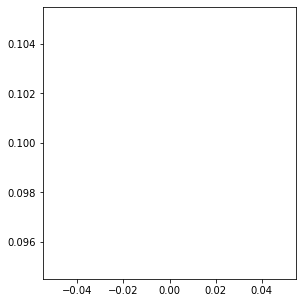

In [28]:
model = Sequential()
    

model.add(Conv2D(filters=96, kernel_size=(11,11),input_shape = (32, 32, 3), activation = 'relu'))                 
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(4064, activation = 'relu'))
#model.add(Dense(4096))
#model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
#model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax'))

    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainy, epochs =1, verbose =1)
    

In [29]:
print(model.evaluate(testX, testy))

313/313 [==============================] - 51s 159ms/step - loss: 0.0000e+00 - accuracy: 0.1000
[0.0, 0.10000000149011612]


## VVG16 Architecture

In [31]:
input = tf.keras.Input(shape =(32,32,3))

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
    # 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
    # 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
    # 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)

    # 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
    # Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
output = Dense(1, activation ='softmax')(x)
    # creating the model

model =tf.keras.Model (inputs=input, outputs =output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainy, epochs =1, verbose =1)

1563/1563 [==============================] - 6815s 4s/step - loss: nan - accuracy: 0.1000


In [32]:
print(model.evaluate(testX, testy))

313/313 [==============================] - 90s 284ms/step - loss: nan - accuracy: 0.1000
[nan, 0.10000000149011612]
